# 6.8: Support Vector Machines Exercises

In [4]:
# Import libaries and objects
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots, cm
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay

We will use the function `RocCurveDisplay.from_estimator()` to produce several ROC plots, using a shorthand `roc_curve`.

In [3]:
roc_curve = RocCurveDisplay.from_estimator # shorthand

### Support Vector Classifier

We'll use the `SupportVectorClassifier()` function (abbreviated `SVC()`) from sklearn to fit the support vector classifier for a given value of the parameter `C`.

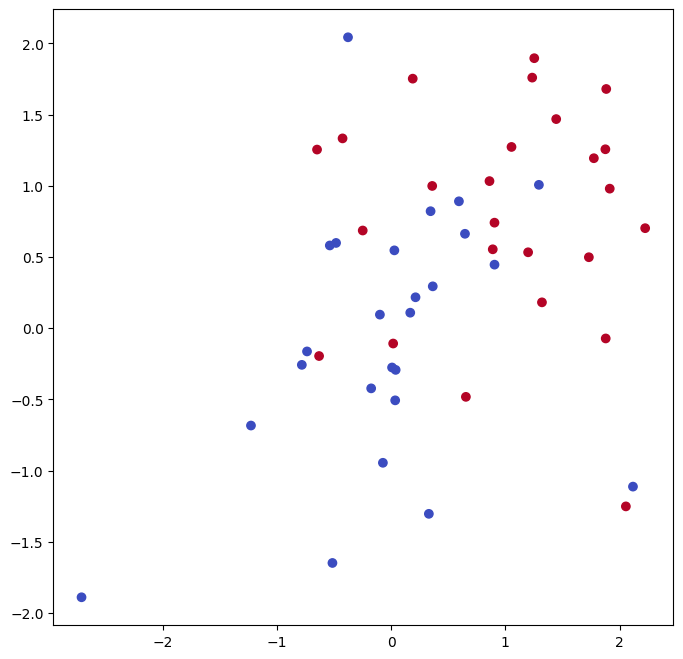

In [10]:
# Check whether the classes are linearly separable (they are not)
rng = np.random.default_rng(1)
X = rng.standard_normal((50, 2))
y = np.array([-1]*25+[1]*25)
X[y==1] += 1
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0],
           X[:,1],
           c=y,
           cmap=cm.coolwarm);

We can see that the observations from each class cannot be separated by a hyperplane so we can’t use the
maximal margin classifier. We will fit a support vector classifier instead. To start let’s put our observations
in a data frame with the response coded as a factor.

Now we can use the `SVC()` function to fit our classifier. We choose kernal = "linear" to specify we wantto fit a support vector classifier and set cost = 10.

In [25]:
# Fit the classifer
svm_linear = SVC(C=10, kernel='linear')
svm_linear.fit(X, y)

SVC(C=10, kernel='linear')

The support vector classifier with two features can be visualized by plotting values of its *decision function*.

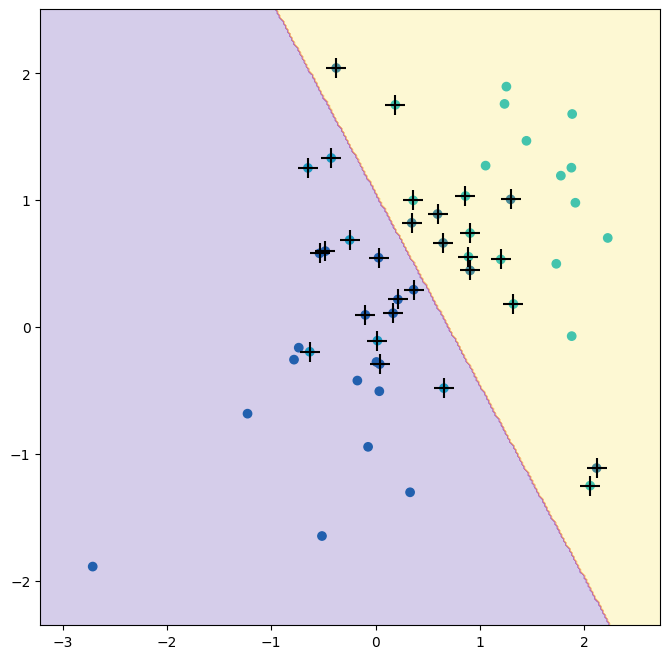

In [26]:
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
         y,
         svm_linear,
         ax=ax)

**Try fitting a support vector classifier with a smaller value for cost. Compare the resultsincluding the number of support vectors to the above two classifiers. From this informationexplain the relationship between the cost parameter and C as we have described in the slides.**

Now we tune the support vector using `sklearn`

In [27]:
kfold = skm.KFold(5, 
                  random_state=0,
                  shuffle=True)
grid = skm.GridSearchCV(svm_linear,
                        {'C':[0.001,0.01,0.1,1,5,10,100]},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')
grid.fit(X, y)
grid.best_params_

{'C': 1}

In [28]:
# Get cross-validation errors
grid.cv_results_[('mean_test_score')]

array([0.46, 0.46, 0.72, 0.74, 0.74, 0.74, 0.74])

We see that `C=1` results in the highest cross-validation accuracy of 0.74, though the accuracy is the same for several values of `C`. The classifier `grid.best_estimator_` can be used to predict the class label on a set of test observations. Let’s generate a test data set.

In [30]:
X_test = rng.standard_normal((20, 2))
y_test = np.array([-1]*10+[1]*10)
X_test[y_test==1] += 1

# Predictions
best_ = grid.best_estimator_
y_test_hat = best_.predict(X_test)
confusion_table(y_test_hat, y_test)

Truth,-1,1
Predicted,,
-1,8,3
1,2,7


In [31]:
best_ = grid.best_estimator_
y_test_hat = best_.predict(X_test)
confusion_table(y_test_hat, y_test)

Truth,-1,1
Predicted,,
-1,8,3
1,2,7


With this value of `C`, 70% of the test observations are correctly classified

### Support Vector Machine
We will once again use the SVC() function to fit an SVM with a non-linear kernel. We first generate some data with anon-linear class boundary.

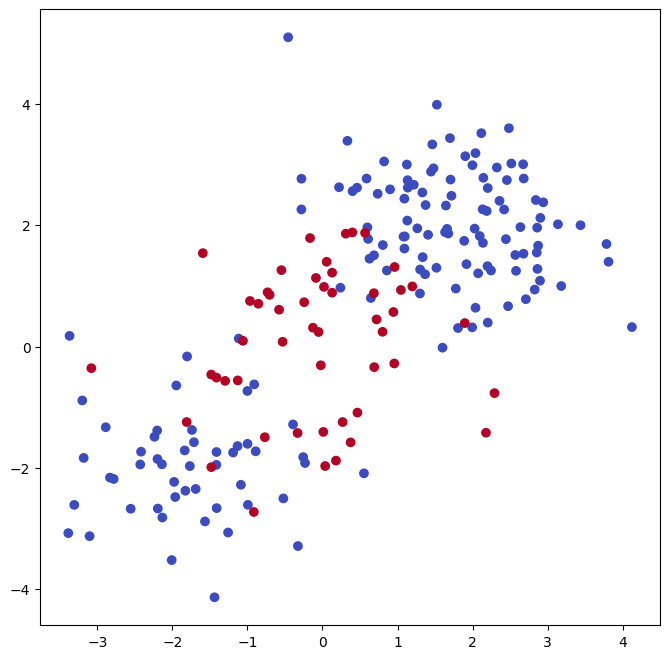

In [32]:
# Generate data
X = rng.standard_normal((200, 2))
X[:100] += 2
X[100:150] -= 2
y = np.array([1]*150+[2]*50)

# Plot data to check for non-linearity
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0],
           X[:,1],
           c=y,
           cmap=cm.coolwarm)

The data is randomly split into training and testing groups. We then
fit the training data using the `SVC()`  estimator with a
radial kernel and $\gamma=1$:

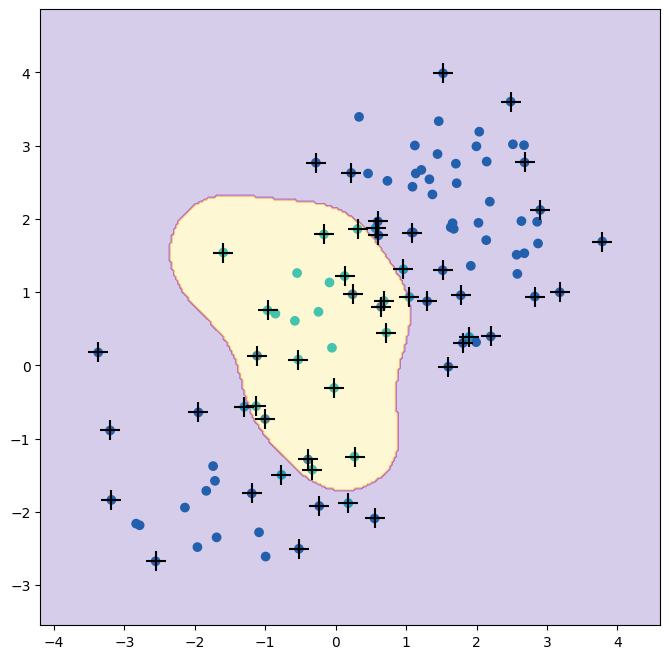

In [36]:
# Splot into training and testing
(X_train, 
 X_test,
 y_train,
 y_test) = skm.train_test_split(X,
                                y,
                                test_size=0.5,
                                random_state=0)
svm_rbf = SVC(kernel="rbf", gamma=1, C=1)
svm_rbf.fit(X_train, y_train)

# Plot
fig, ax = subplots(figsize=(8,8))
plot_svm(X_train,
         y_train,
         svm_rbf,
         ax=ax)

**Perform cross-validation using `skm.GridSearchCV()` to select the best choice of gamma and cost. Try theranges cost = c(0.1, 1, 10, 100, 1000) and gamma = c(0.5, 1, 2, 3, 4). Output the bestmodel.**

**Using the best model, predict the responses for the test set. What percent of observations weremisclassified by this SVM?**

*These exercises were adapted from :* James, Gareth, et al. An Introduction to Statistical Learning: with Applications in Python, Springer, 2023.